In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go 

py.init_notebook_mode(connected=True)


In [2]:
condos_final = pd.read_csv('final_condos.csv')

In [3]:
condos_final.head(5)

,Unnamed: 0,Prices,Location,Date_listed,Bedrooms,Bathrooms,Maint_Fees,Size,Parking,Avg_Size,Street Address
0,0,648000,20 - 375 Cook Rd,20 minutes,6.0,6.0,322.0,"1,400-1,599 sqft",2.0,1499.5,375 Cook Rd
1,1,799900,608 - 284 Bloor St W,3 hours,2.0,2.0,790.0,700-799 sqft,0.0,749.5,284 Bloor St W
2,2,460000,308 - 120 Dundalk Dr,4 hours,3.0,3.0,874.0,"1,200-1,399 sqft",1.0,1299.5,120 Dundalk Dr
3,3,549000,435 - 1091 Kingston Rd,4 hours,1.0,1.0,568.0,700-799 sqft,1.0,749.5,1091 Kingston Rd
4,4,549000,515 - 105 George St,5 hours,1.0,1.0,402.0,500-599 sqft,0.0,549.5,105 George St


In [4]:
condos_final.drop(columns='Unnamed: 0',inplace=True)

In [6]:
condos_final.rename(columns={"Avg_Size":'Condo_Size','Size':'Size_range'},inplace= True)

In [67]:
condos_final.head()

,Prices,Location,Date_listed,Bedrooms,Bathrooms,Maint_Fees,Size_range,Parking,Condo_Size,Street Address
0,648000,20 - 375 Cook Rd,20 minutes,6.0,6.0,322.0,"1,400-1,599 sqft",2.0,1499.5,375 Cook Rd
1,799900,608 - 284 Bloor St W,3 hours,2.0,2.0,790.0,700-799 sqft,0.0,749.5,284 Bloor St W
2,460000,308 - 120 Dundalk Dr,4 hours,3.0,3.0,874.0,"1,200-1,399 sqft",1.0,1299.5,120 Dundalk Dr
3,549000,435 - 1091 Kingston Rd,4 hours,1.0,1.0,568.0,700-799 sqft,1.0,749.5,1091 Kingston Rd
4,549000,515 - 105 George St,5 hours,1.0,1.0,402.0,500-599 sqft,0.0,549.5,105 George St


In [24]:
condos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 10 columns):
Prices            2031 non-null int64
Location          2031 non-null object
Date_listed       2031 non-null object
Bedrooms          1971 non-null float64
Bathrooms         1971 non-null float64
Maint_Fees        2031 non-null float64
Size_range        2031 non-null object
Parking           2031 non-null float64
Condo_Size        2031 non-null float64
Street Address    2031 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 158.8+ KB


In [8]:
round(condos_final.describe(),2)

,Prices,Bedrooms,Bathrooms,Maint_Fees,Parking,Condo_Size
count,2031.00,1971.00,1971.00,2031.00,2031.00,2031.00
mean,828853.63,1.73,1.73,647.47,0.91,923.11
std,680716.13,0.77,0.77,454.22,0.62,506.94
min,249000.00,1.00,1.00,1.00,0.00,249.50
25%,569000.00,1.00,1.00,432.00,1.00,649.50
50%,679900.00,2.00,2.00,568.00,1.00,749.50
75%,849900.00,2.00,2.00,712.50,1.00,1099.50
max,14998000.00,6.00,6.00,7150.00,5.00,5050.00


In [ ]:
# Implies Average price per sq ft = $ 897 / sqft

In [29]:
#Replacing the missing values by mean values for bedroom and bathroom that is 1.73 or 2
condos_final['Bedrooms'] = condos_final['Bedrooms'].fillna(2)
condos_final['Bathrooms'] = condos_final['Bedrooms'].fillna(2)
condos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 10 columns):
Prices            2031 non-null int64
Location          2031 non-null object
Date_listed       2031 non-null object
Bedrooms          2031 non-null float64
Bathrooms         2031 non-null float64
Maint_Fees        2031 non-null float64
Size_range        2031 non-null object
Parking           2031 non-null float64
Condo_Size        2031 non-null float64
Street Address    2031 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 158.8+ KB


In [30]:
condos_final['Bedrooms'].value_counts()

2.0    906
1.0    856
3.0    229
4.0     32
5.0      5
6.0      3
Name: Bedrooms, dtype: int64

## Interesting Visualizations

In [56]:
condos_subset = condos_final[(condos_final['Bedrooms']==1) | (condos_final['Bedrooms']==2) | (condos_final['Bedrooms']==3)]  

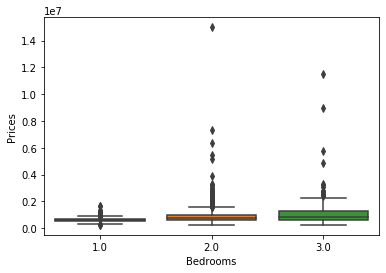

In [68]:
#1. Distributions
sns.boxplot(x=condos_subset['Bedrooms'], y= condos_subset['Prices'])

## Analysis by Bedroom

In [59]:
#2. Average Price by Bedroom
price_by_bed = round(condos_subset.groupby(['Bedrooms'])['Prices'].mean(),0)
price_by_bed

Bedrooms
1.0     630353.0
2.0     914117.0
3.0    1139037.0
Name: Prices, dtype: float64

In [151]:
data = go.Bar(
    x=price_by_bed.index,
    y=price_by_bed.values,
    
) 

layout = go.Layout(title='Average Condo Price',
    xaxis_title="No. of Beds",
    yaxis_title="Value in $M"
                  )


fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [154]:
maint_by_bed = condos_subset.groupby('Bedrooms')['Maint_Fees'].mean()

In [149]:
data = go.Bar(
    x=maint_by_bed.index,
    y=maint_by_bed.values,
 

) 

layout = go.Layout(title='Average Monthly Maintenance Fees',
    xaxis_title="No. of Beds",
    yaxis_title="Value in $"
                  )


fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [156]:
size_by_bed = condos_subset.groupby('Bedrooms')['Condo_Size'].mean() 
size_by_bed

Bedrooms
1.0     634.956192
2.0    1008.304636
3.0    1500.674672
Name: Condo_Size, dtype: float64

In [159]:
data = go.Bar(
    x=size_by_bed.index,
    y=size_by_bed.values,

) 

layout = go.Layout(title='Condo Size by number of bedrooms',
                  xaxis_title="No. of Beds",
                   yaxis_title="Average Size",
                  )

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Analysis by Size

In [61]:
size_range = condos_subset['Size_range'].value_counts().head(10)

In [62]:
size_range

600-699 sqft        373
700-799 sqft        275
500-599 sqft        266
1,000-1,199 sqft    220
800-899 sqft        196
900-999 sqft        179
1,200-1,399 sqft    129
0-499 sqft          122
1,400-1,599 sqft     86
1,600-1,799 sqft     40
Name: Size_range, dtype: int64

In [148]:
# Number of listings by size range of condo
data = go.Bar(
    x=size_range.index,
    y=size_range.values,

) 

layout = go.Layout(title='Condo Listings by Size',
                  yaxis_title="No. of Lsitings")

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [132]:
#Relationship between Price and Condo_Size
condos_by_size = condos_subset[(condos_subset['Size_range'] == '0-499 sqft')| (condos_subset['Size_range'] == '500-599 sqft')|\
             (condos_subset['Size_range'] == '600-699 sqft')| (condos_subset['Size_range'] == '700-799 sqft')]
condos_by_size

,Prices,Location,Date_listed,Bedrooms,Bathrooms,Maint_Fees,Size_range,Parking,Condo_Size,Street Address
1,799900,608 - 284 Bloor St W,3 hours,2.0,2.0,790.00,700-799 sqft,0.0,749.5,284 Bloor St W
3,549000,435 - 1091 Kingston Rd,4 hours,1.0,1.0,568.00,700-799 sqft,1.0,749.5,1091 Kingston Rd
4,549000,515 - 105 George St,5 hours,1.0,1.0,402.00,500-599 sqft,0.0,549.5,105 George St
5,799000,605 Dufferin St,5 hours,3.0,3.0,647.47,600-699 sqft,1.0,649.5,605 Dufferin St
6,608000,707 - 68 Shuter St N,39 minutes,1.0,1.0,555.00,500-599 sqft,1.0,549.5,68 Shuter St N
...,...,...,...,...,...,...,...,...,...,...
2023,470000,404 - 199 Richmond St W,21 days,2.0,2.0,356.00,0-499 sqft,0.0,249.5,199 Richmond St W
2027,749900,1401 - 88 Blue Jays Way,22 days,1.0,1.0,427.00,600-699 sqft,1.0,649.5,88 Blue Jays Way
2028,585000,204 - 100 Harrison Garden Blvd,22 days,1.0,1.0,403.00,600-699 sqft,1.0,649.5,100 Harrison Garden Blvd
2029,619000,S421 - 455 Front St E,22 days,1.0,1.0,452.00,600-699 sqft,0.0,649.5,455 Front St E


In [137]:
data = go.Box(
    x=condos_by_size['Size_range'],
    y=condos_subset['Prices'],
   
) 

layout = go.Layout(title='Price Distribution across Size',
                  yaxis_title="Price in $M",
                  xaxis_title = 'Size Range')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [140]:
maint_by_size = condos_by_size.groupby('Size_range')['Maint_Fees'].mean()
maint_by_size

Size_range
0-499 sqft      322.499508
500-599 sqft    401.426579
600-699 sqft    490.650617
700-799 sqft    568.328545
Name: Maint_Fees, dtype: float64

In [152]:
data = go.Bar(
    x=maint_by_size.index,
    y=maint_by_size.values,
    
   
) 

layout = go.Layout(title='Monthly Maintenance Fee by Size',
                  yaxis_title="Price in CAD",
                  xaxis_title = 'Size Range')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

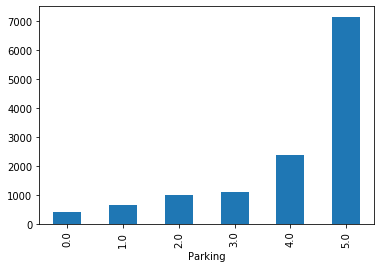

In [69]:
#Maintenance versus parking : Maybe plotly would be better
maint_parking.plot(kind='bar')